**Chapter 04**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 10
## 10(a)

In [36]:
weekly_file_path = '../data/Weekly.csv'
weekly = pd.read_csv(weekly_file_path, index_col=0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [37]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


/Users/gaufung/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


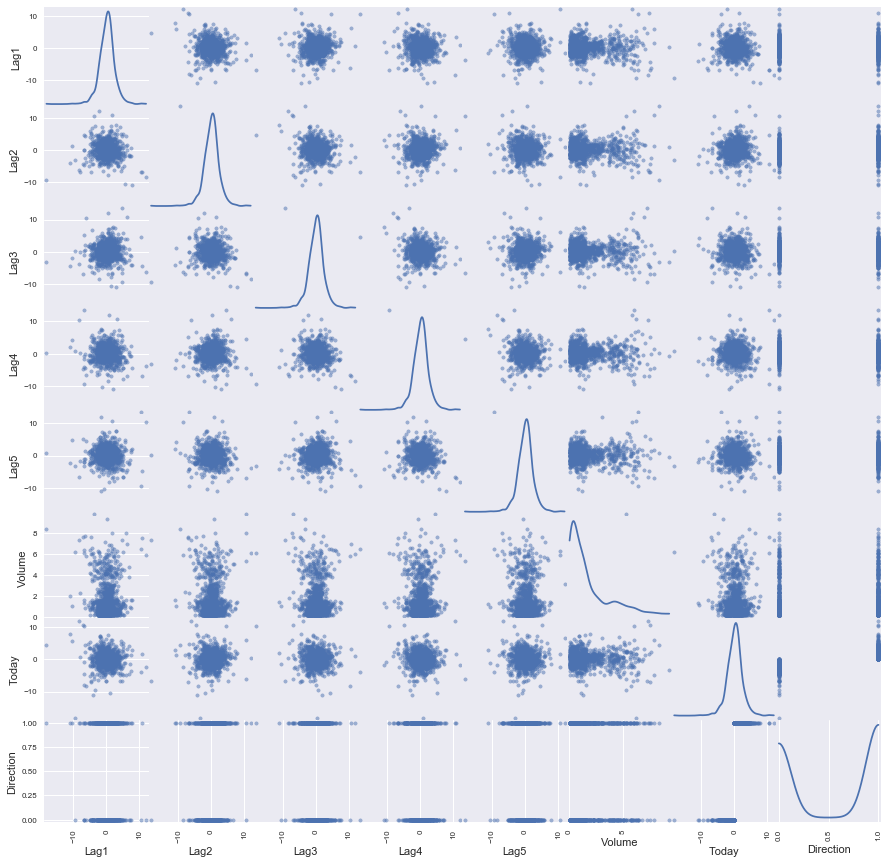

In [16]:
from pandas.tools.plotting import scatter_matrix
weekly_refine = weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume','Today','Direction']]
weekly_refine=weekly_refine.replace('Up',1)
weekly_refine=weekly_refine.replace('Down',0)
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(weekly_refine,alpha=0.5,diagonal='kde', ax=ax);

In [17]:
weekly_refine.corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Lag1,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


# 10(b)

In [29]:
from sklearn.linear_model import LogisticRegression
X = weekly_refine[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']].values
y = weekly_refine['Direction'].values
y = y.reshape((len(y),1))
lg = LogisticRegression()
lg.fit(X,y)

/Users/gaufung/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
print(lg.coef_,lg.intercept_)

[[-0.04117292  0.05846974 -0.01599122 -0.02769998 -0.01440289 -0.02212844]] [ 0.26484745]


## 10(c)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred = lg.predict(X)
confusion_matrix(y,pred)

array([[ 55, 429],
       [ 47, 558]])

In [35]:
print(accuracy_score(y,pred))

0.56290174472


## 10(d)

In [42]:
df_train = weekly[weekly['Year'].isin(range(1990,2009))]
df_test = weekly[weekly['Year'].isin(range(2009,2011))]
# training data
X_train = df_train['Lag2'].values
X_train = X_train.reshape((len(X_train),1))
y_train = df_train['Direction'].values
# test data
X_test = df_test['Lag2'].values
X_test = X_test.reshape((len(X_test),1))
y_test = df_test['Direction'].values
# lg
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
pred_test = lg.predict(X_test)
print(confusion_matrix(y_test, pred_test))

[[ 9 34]
 [ 5 56]]


In [44]:
print(accuracy_score(y_test,pred_test))

0.625


# 10(e)

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [46]:
pred_test = lda.predict(X_test)
print(confusion_matrix(y_test, pred_test))

[[ 9 34]
 [ 5 56]]


In [47]:
print(accuracy_score(y_test,pred_test))

0.625


## 10(f)

In [48]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [49]:
pred_test = qda.predict(X_test)
print(confusion_matrix(y_test, pred_test))

[[ 0 43]
 [ 0 61]]


In [50]:
print(accuracy_score(y_test, pred_test))

0.586538461538


## 10(g)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))

[[16 27]
 [22 39]]


In [56]:
print(accuracy_score(y_test, pred_test))

0.528846153846


# 11

In [57]:
auto_file_path = '../data/Auto'
autos = pd.read_table(auto_file_path,sep='\s+')
autos=autos.replace('?',np.NAN).dropna()
autos['horsepower']=autos['horsepower'].astype('float')
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## 11(a)

In [59]:
mpgs = autos['mpg'].values
mpg_med = np.median(mpgs)
mpg0 = [1 if mpg > mpg_med else 0 for mpg in mpgs]
autos['mpg0'] = mpg0
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg0
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0


## 11(b)

/Users/gaufung/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


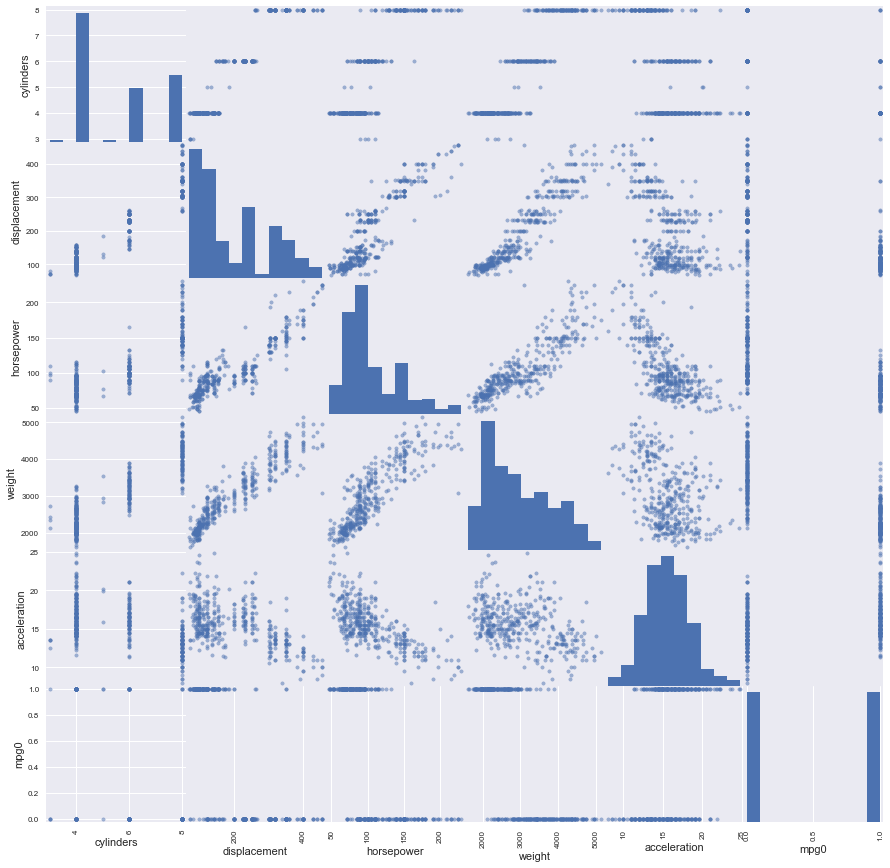

In [62]:
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(autos[['cylinders','displacement','horsepower','weight','acceleration','mpg0']],ax=ax);

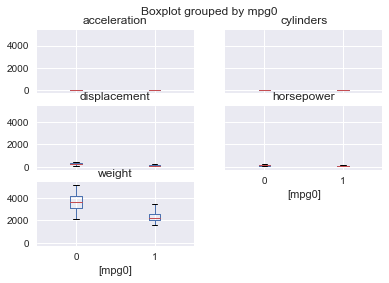

In [64]:
autos[['cylinders','displacement','horsepower','weight','acceleration','mpg0']].boxplot(by='mpg0');

## 11(c)

In [81]:
autos_train = autos[autos.apply(lambda x: x['year'] %2 ==0, axis=1)]
autos_test = autos[autos.apply(lambda x:x['year'] % 2 != 0, axis=1)]
variables = ['cylinders','weight','displacement','horsepower']
response = ['mpg0']
X_train = autos_train[variables].values
y_train = autos_train[response].values
y_train = y_train.reshape((len(y_train)))
X_test =  autos_test[variables].values
y_test = autos_test[response].values
y_test = y_test.reshape((len(y_test)))

## 11(d)

In [82]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [83]:
pred = lda.predict(X_test)
print(accuracy_score(y_test, pred))

0.873626373626


## 11(e)

In [84]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [85]:
pred = qda.predict(X_test)
print(accuracy_score(y_test, pred))

0.868131868132


## 11(f)

In [86]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
pred = lg.predict(X_test)
print(accuracy_score(y_test, pred))

0.873626373626


## 11(g)

In [90]:
ks=[1,3,5,7,9,11,13,15]
accur={}
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accur[k]=accuracy_score(y_test,pred)
for k,v in accur.items():
    print('k is %d :'%k, 'accuracy is %f'%v)

k is 1 : accuracy is 0.846154
k is 3 : accuracy is 0.862637
k is 5 : accuracy is 0.851648
k is 7 : accuracy is 0.851648
k is 9 : accuracy is 0.840659
k is 11 : accuracy is 0.846154
k is 13 : accuracy is 0.846154
k is 15 : accuracy is 0.840659


When $k$ equals to $3$, the knn classifier has the highest accuracy scores, $0.8625$.

# 12

## 12(a)

In [91]:
def Power():
    return 2*2*2
Power()

8

## 12(b)

In [95]:
def Power2(x,a):
    res = 1
    while a>=1:
        res *= x
        a -= 1
    return res
Power2(3,8)

6561

## 12(c,d)

In [96]:
Power2(10,3)

1000

In [97]:
Power2(8,17)

2251799813685248

In [98]:
Power2(131,3)

2248091

## 12(e)

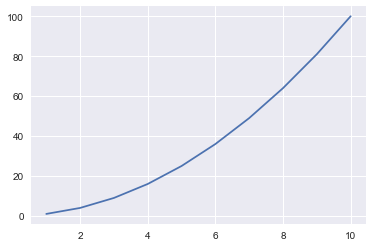

In [99]:
x = range(1,11,1)
y = [Power2(item,2) for item in x]
plt.plot(x,y)
plt.show()

# 13

In [100]:
boston_file_name = '../data/Boston.csv'
bostons = pd.read_csv(boston_file_name, index_col=0)
bostons.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [107]:
crims = bostons['crim'].values
crims_med = np.median(crims)
cime_statue = [1 if crim > crims_med else 0 for crim in crims]
bostons['crim_statue'] = cime_statue

In [112]:
X = bostons[['dis']].values
y = bostons['crim_statue'].values
lg = LogisticRegression()
lg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
print(lg.coef_,lg.intercept_)

[[-0.95466145]] [ 3.31112177]


The logistic regression coefficient is $-0.95466145$, that is negitive, We infer that distance will eliminate the influence on crime. the distances increase 1 unit, the logit ($log(\frac{\text{high crime ratio}}{\text{low crim ratio}})$)of crime will decrease $-0.95$ unit.